In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline


#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [2]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the dataset
trainingData = pd.read_csv("regression_train.csv")

In [4]:
#(print the number of rows and columns).
num_rows, num_cols  = trainingData.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 93
Number of rows: 3084


In [5]:
#check the statistics of the data per columns
trainingData.describe()

,WifiAccessPoint_0,WifiAccessPoint_1,WifiAccessPoint_2,WifiAccessPoint_3,WifiAccessPoint_4,WifiAccessPoint_5,WifiAccessPoint_6,WifiAccessPoint_7,WifiAccessPoint_8,WifiAccessPoint_9,...,WifiAccessPoint_83,WifiAccessPoint_84,WifiAccessPoint_85,WifiAccessPoint_86,WifiAccessPoint_87,WifiAccessPoint_88,WifiAccessPoint_89,WifiAccessPoint_90,x,y
count,3084.000000,2298.000000,2747.000000,1837.000000,1548.000000,1784.000000,1749.000000,2091.000000,1787.000000,2717.000000,...,35.000000,20.000000,15.000000,11.000000,4.00000,4.000000,10.000000,6.000000,3063.000000,3063.000000
mean,-126.590143,-69.885553,-69.925009,-67.720740,-66.896641,-71.618834,-75.361921,-68.000000,-75.498041,-70.163784,...,-89.485714,-88.150000,-85.933333,-86.454545,-80.75000,-89.500000,-83.400000,-90.666667,0.532501,0.506587
std,5.056859,11.988474,11.946051,10.274228,10.347594,13.882424,9.215011,9.883484,9.156067,11.682441,...,5.226468,6.268342,5.243590,4.367233,7.36546,5.196152,5.910443,2.732520,0.235508,0.280231
min,-145.000000,-102.000000,-104.000000,-96.000000,-91.000000,-103.000000,-106.000000,-97.000000,-99.000000,-105.000000,...,-101.000000,-99.000000,-93.000000,-93.000000,-88.00000,-95.000000,-95.000000,-95.000000,0.025027,0.024112
25%,-130.000000,-79.000000,-79.000000,-75.000000,-74.000000,-82.000000,-82.000000,-75.000000,-82.000000,-78.000000,...,-93.000000,-91.000000,-89.500000,-89.000000,-86.50000,-92.750000,-86.000000,-91.750000,0.355164,0.280067
50%,-127.000000,-70.000000,-70.000000,-68.000000,-67.000000,-74.000000,-76.000000,-69.000000,-75.000000,-71.000000,...,-90.000000,-89.500000,-86.000000,-87.000000,-81.00000,-90.000000,-83.000000,-90.500000,0.565723,0.498883
75%,-123.000000,-62.000000,-61.000000,-61.000000,-60.000000,-60.000000,-69.000000,-62.000000,-69.000000,-62.000000,...,-86.500000,-86.500000,-83.000000,-84.000000,-75.25000,-86.750000,-81.000000,-89.250000,0.692189,0.753994
max,-107.000000,-29.000000,-33.000000,-35.000000,-27.000000,-30.000000,-46.000000,-36.000000,-40.000000,-33.000000,...,-79.000000,-71.000000,-76.000000,-78.000000,-73.00000,-83.000000,-75.000000,-87.000000,0.935176,0.988379


In [6]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 93 columns):
WifiAccessPoint_0     3084 non-null int64
WifiAccessPoint_1     2298 non-null float64
WifiAccessPoint_2     2747 non-null float64
WifiAccessPoint_3     1837 non-null float64
WifiAccessPoint_4     1548 non-null float64
WifiAccessPoint_5     1784 non-null float64
WifiAccessPoint_6     1749 non-null float64
WifiAccessPoint_7     2091 non-null float64
WifiAccessPoint_8     1787 non-null float64
WifiAccessPoint_9     2717 non-null float64
WifiAccessPoint_10    1266 non-null float64
WifiAccessPoint_11    1952 non-null float64
WifiAccessPoint_12    1315 non-null float64
WifiAccessPoint_13    2651 non-null float64
WifiAccessPoint_14    2665 non-null float64
WifiAccessPoint_15    2063 non-null float64
WifiAccessPoint_16    2815 non-null float64
WifiAccessPoint_17    185 non-null float64
WifiAccessPoint_18    2106 non-null float64
WifiAccessPoint_19    1280 non-null float64
WifiAccessPoint_

In [7]:
#check for missing values
missing_values_count = trainingData.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 74.54569543812671%


In [8]:
trainingData.iloc[:, 0:90] = np.where(trainingData.iloc[:, 0:90] <= 0, 
               trainingData.iloc[:, 0:90] + 105, 
                trainingData.iloc[:, 0:90] - 100)

In [9]:
trainingData.fillna(trainingData.mean(), inplace=True)

In [10]:
trainingData

,WifiAccessPoint_0,WifiAccessPoint_1,WifiAccessPoint_2,WifiAccessPoint_3,WifiAccessPoint_4,WifiAccessPoint_5,WifiAccessPoint_6,WifiAccessPoint_7,WifiAccessPoint_8,WifiAccessPoint_9,...,WifiAccessPoint_83,WifiAccessPoint_84,WifiAccessPoint_85,WifiAccessPoint_86,WifiAccessPoint_87,WifiAccessPoint_88,WifiAccessPoint_89,WifiAccessPoint_90,x,y
0,-20.0,40.000000,38.000000,34.00000,38.103359,34.000000,31.000000,57.0,14.000000,66.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.220686,0.692311
1,-16.0,35.114447,29.000000,37.27926,26.000000,24.000000,33.000000,39.0,31.000000,49.000000,...,13.000000,16.00,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.356841,0.707761
2,-25.0,35.114447,7.000000,37.27926,38.103359,33.381166,29.638079,30.0,29.501959,31.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.271492,0.395226
3,-20.0,56.000000,49.000000,42.00000,42.000000,58.000000,36.000000,35.0,32.000000,37.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.413128,0.860029
4,-12.0,35.114447,30.000000,23.00000,38.103359,33.381166,29.638079,37.0,29.501959,23.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.324798,0.107172
5,-19.0,20.000000,49.000000,45.00000,25.000000,33.381166,29.638079,37.0,29.501959,34.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.496662,0.340181
6,-18.0,35.114447,22.000000,25.00000,38.103359,33.381166,29.638079,37.0,29.501959,34.836216,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.648982,0.288677
7,-23.0,39.000000,47.000000,42.00000,30.000000,33.381166,24.000000,37.0,28.000000,34.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.715565,0.581690
8,-24.0,24.000000,49.000000,46.00000,31.000000,27.000000,26.000000,57.0,32.000000,47.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.354833,0.609341
9,-17.0,15.000000,25.000000,29.00000,23.000000,33.381166,29.638079,21.0,25.000000,31.000000,...,15.514286,16.85,19.066667,18.545455,24.25,15.5,21.6,-90.666667,0.507559,0.239038


Text(0.5, 1.0, 'Long-Lat Plot')

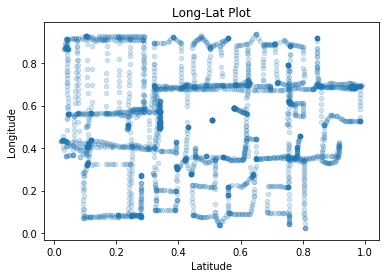

In [11]:
trainingData.plot(kind="scatter", x="y", y="x", alpha=0.2)
plt.savefig('data_map.png')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Long-Lat Plot')

Text(61.0, 0.5, 'Longitude')

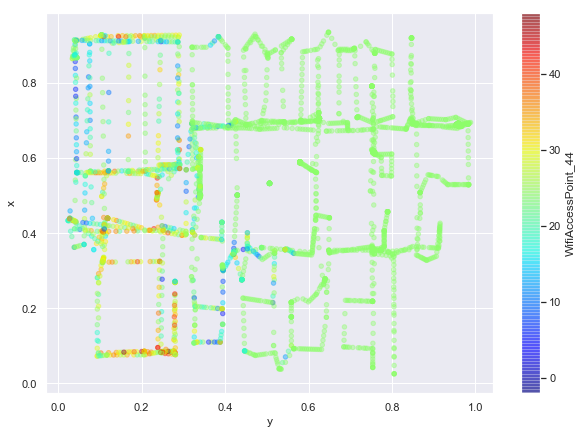

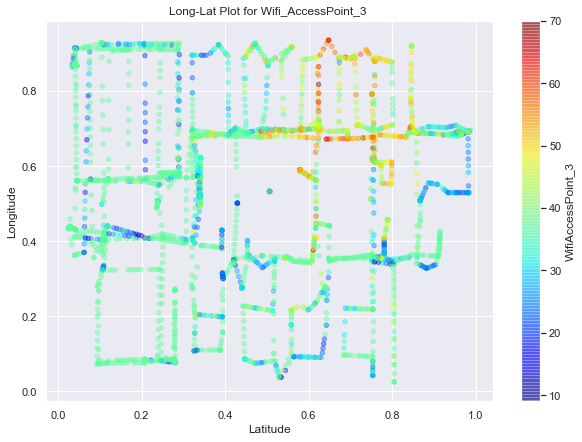

In [61]:
#map the data by user ID
#i.e. see how much of the information in each building was collected by how many users
trainingData.plot(kind="scatter", x="y", y="x", alpha=0.4, figsize=(10,7),c="WifiAccessPoint_44",
     cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
trainingData.plot(kind="scatter", x="y", y="x", alpha=0.4, figsize=(10,7),c="WifiAccessPoint_3",
     cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('user_map2.png')
plt.title('Long-Lat Plot for Wifi_AccessPoint_44 ')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('user_map22.png')
plt.title('Long-Lat Plot for Wifi_AccessPoint_3 ')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

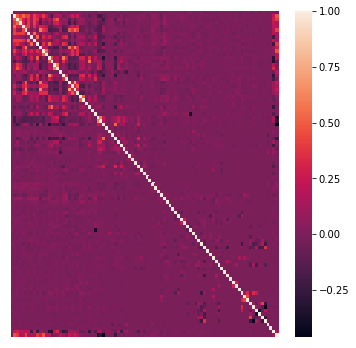

In [13]:
# plot the correlations between the WAP features
corr_matrix = trainingData.corr()
fig = plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,xticklabels=False, yticklabels=False)

Comment: Data is not so correlated 

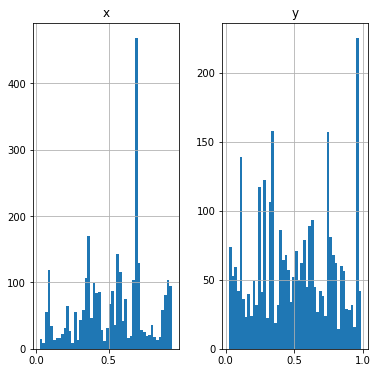

In [14]:
# plot the histograms of the attributes
trainingData.iloc[:, 91:93].hist(bins=50, figsize=(6,6))
plt.savefig("attribute_histogram_plots")
plt.show()

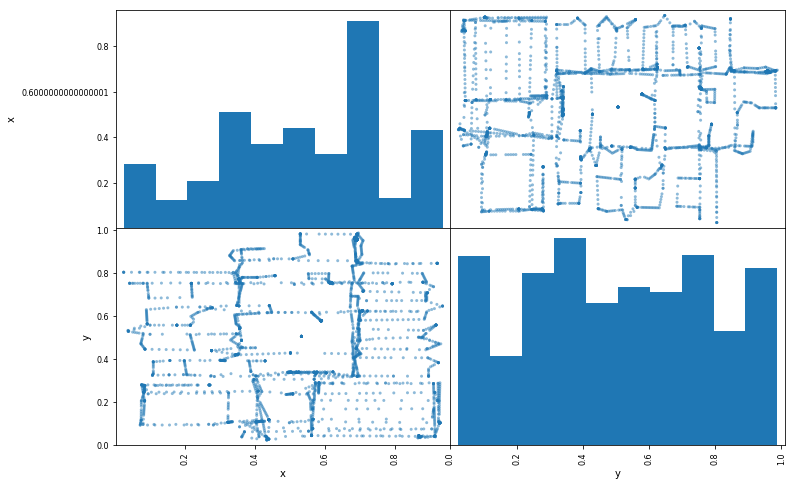

In [15]:
attributes = ["x","y",]
scatter_matrix(trainingData[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [16]:
X =trainingData.drop(['x', 'y'], axis=1)
y = trainingData[['x', 'y']]
    

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,shuffle=True) 
                                                    

In [26]:
#y_train

In [19]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 77.
Total Variance Explained by PCA Components = 0.9536643516824354.


In [21]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [22]:
#len(X_train_pca)

In [23]:
#len(y_train)

In [24]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train_pca, y_train)
clf.predict ([X_train_pca[0]])


array([[0.41558296, 0.74488877]])

In [55]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

reg=GradientBoostingRegressor()

param_grid = {'estimator__max_depth':[3, 5,10,15],
              'estimator__n_estimators': [10,100, 500, 1000]}

gs = GridSearchCV(MultiOutputRegressor(reg), param_grid=param_grid,)

# to set number of jobs to the number of cores, use n_jobs=-1
gs.fit(X_train_pca, y_train)

C:\Users\eparuji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
           n_jobs=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'estimator__max_depth': [3, 5, 10, 15], 'estimator__n_estimators': [10, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print('Best score: ',gs.best_score_ )
print('k value with best score: ',gs.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.7886105067120033
k value with best score:  {'estimator__max_depth': 5, 'estimator__n_estimators': 500}
Train AUC scores
[0.53998781 0.87507778 0.9835349  0.9977893  0.69117344 0.97994189
 0.99996704 0.99999846 0.85459773 0.99999844 0.99999847 0.99999848
 0.87743198 0.99999846 0.99999846 0.99999846]
CV AUC scores
[0.50280777 0.74433743 0.76400871 0.76444823 0.61015882 0.78438402
 0.78861051 0.78844407 0.64652213 0.74905773 0.74790299 0.75061769
 0.60490897 0.64142876 0.6410632  0.64120911]


C:\Users\eparuji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [47]:
from sklearn.metrics import confusion_matrix
y_pred = gs.predict(X_test_pca)
print("Random Forest classifier has accuracy of: ", gs.score(X_test_pca, y_test))


Random Forest classifier has accuracy of:  0.7977386460780953
